In [2]:
import tensorflow as tf
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
import matplotlib.pyplot as plt

In [3]:
resnet = ResNet50()

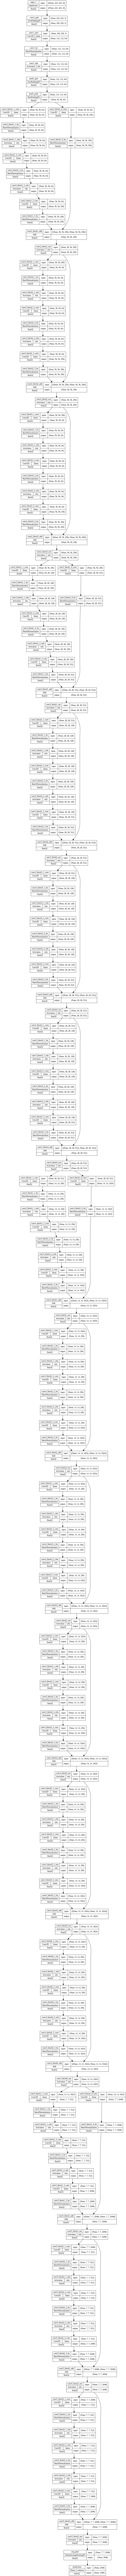

In [4]:
plot_model(resnet, show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True)

In [5]:
resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

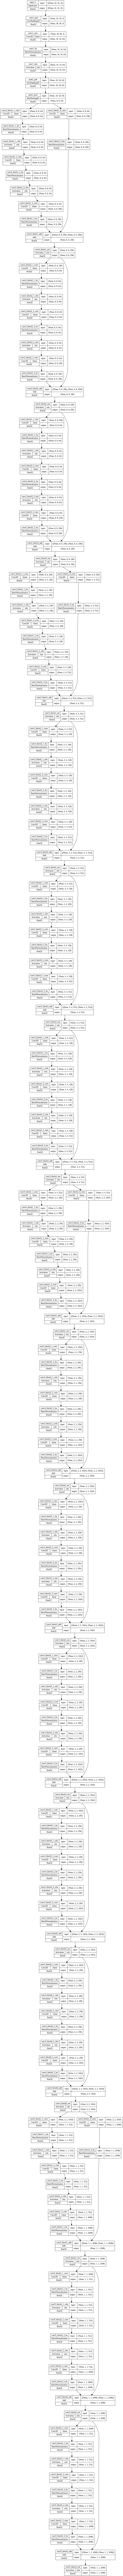

In [6]:
plot_model(resnet50, show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True)

In [7]:
from keras.datasets import cifar10

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
# Fine Tuned Layers which are Trainable

# Flatten Output Layer of ResNet
flattened = Flatten()(resnet50.output)

# Fully Connected Layer - 1
fc1 = Dense(128, activation='relu', name="AddedDense1")(flattened)

# Fully Connected Layer - 2
fc2 = Dense(10, activation='softmax', name="AddedDense2")(fc1)

In [12]:
resnet50.trainable = False # Freezing weights of Pre-trained Model

In [13]:
model = Model(inputs=resnet50.input, outputs=fc2)

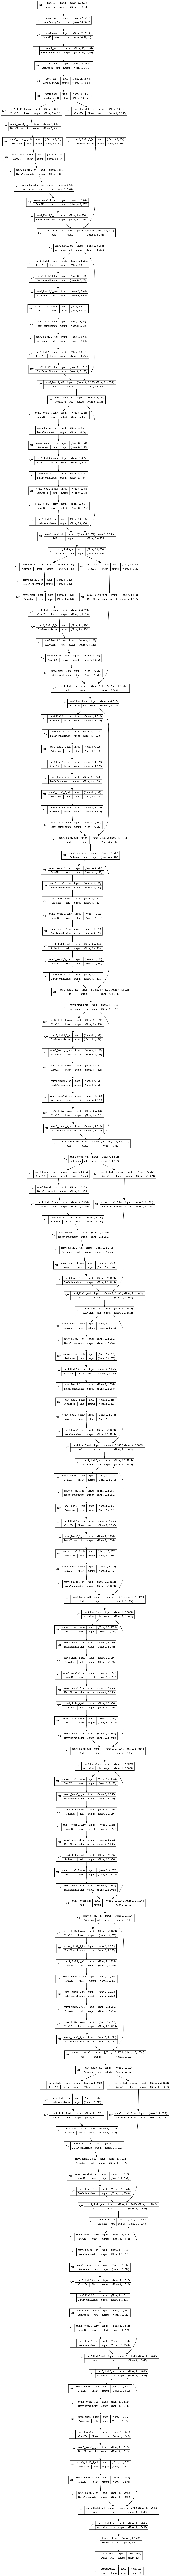

In [14]:
plot_model(model, show_trainable=True, show_layer_activations=True, show_layer_names=True, show_shapes=True) # NT = Non-Trainable, T = Trainable

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 23s 11ms/step - loss: 1.2881 - accuracy: 0.5513
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0657 - accuracy: 0.6220
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9861 - accuracy: 0.6508
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9251 - accuracy: 0.6725
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8718 - accuracy: 0.6913
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8270 - accuracy: 0.7066
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7738 - accuracy: 0.7242
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7338 - accuracy: 0.7401
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6927 - accuracy: 0.7556
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [17]:
resnet50.trainable = True # Making weights trainable

In [18]:
model = Model(inputs=resnet50.input, outputs=fc2)

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 103s 43ms/step - loss: 1.4246 - accuracy: 0.5129
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2595 - accuracy: 0.5637
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2213 - accuracy: 0.5728
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1436 - accuracy: 0.6013
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1560 - accuracy: 0.6003
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1545 - accuracy: 0.5983
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0242 - accuracy: 0.6445
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0199 - accuracy: 0.6441
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1711 - accuracy: 0.5882
Epoch 10/10
1563/1563 [==============================] - 67s 43